In [5]:
install.packages("gdata")
require(gdata)

also installing the dependency ‘gtools’

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [50]:
data <-read.xls("NHLTop100.xlsx",header=T)
nhl <- data[,c("G","A")]
nhl

G,A
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063
690,1033
681,1007
625,1016
717,873


#### After the initial fitting

In [105]:
model.a<- lm(A~G,nhl)
model.a
summary(model.a)


Call:
lm(formula = A ~ G, data = nhl)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  



Call:
lm(formula = A ~ G, data = nhl)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


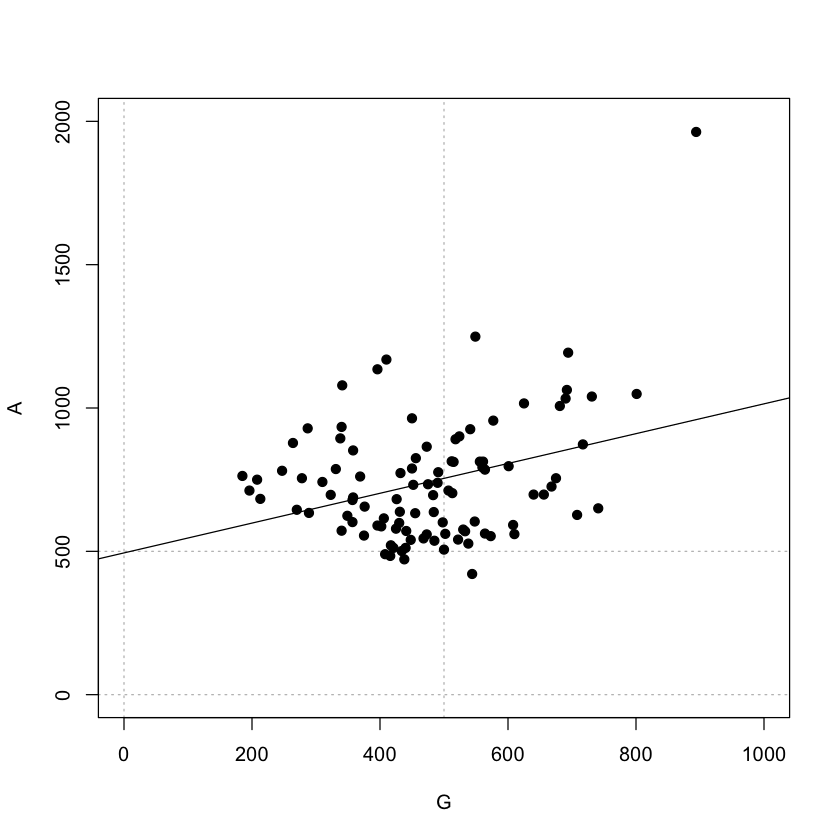

In [116]:
plot(nhl,pch=19,ylim=c(0,2000),xlim=c(0,1000),panel.first=abline(h=c(0,500),v=c(0,500),lty=3,col="gray"))
abline(lm(A~G,data=nhl))

#### Forced through Wayne Gretzky (G=894, A=1963)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = nhl)

Coefficients:
I(G - 894)  
     2.685  



Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = nhl)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


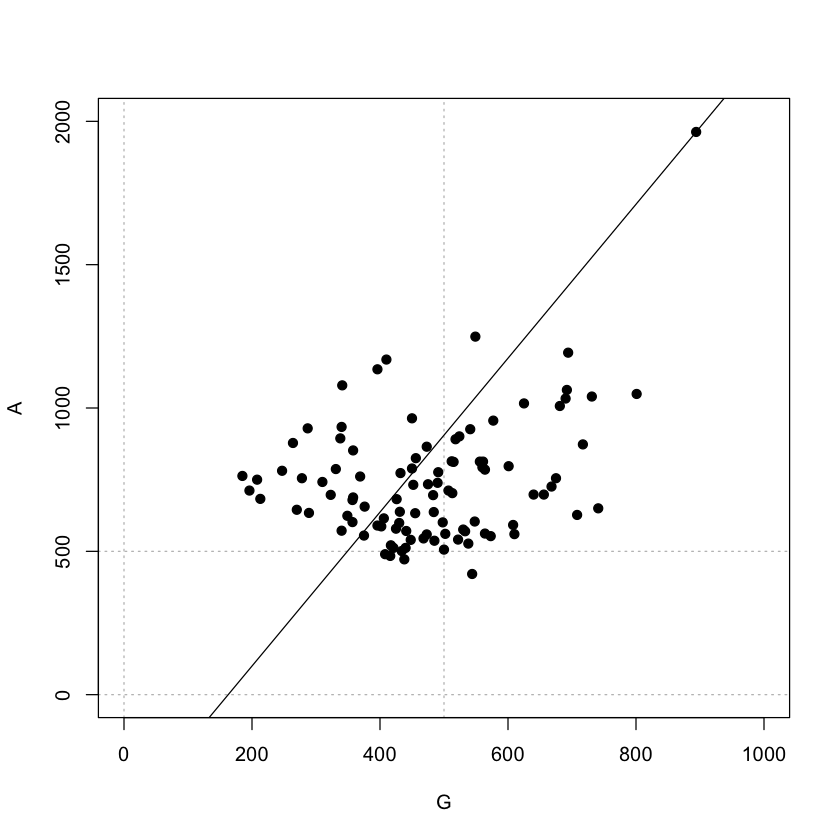

In [151]:
model.b<- lm(I(A-1963)~I(G-894)+0,nhl)
model.b
summary(model.b)
plot(nhl,pch=19,ylim=c(0,2000),xlim=c(0,1000),panel.first=abline(h=c(0,500),v=c(0,500),lty=3,col="gray"))
abline(predict(model.b, newdata = list(G=0))+1963, coef(model.b))

In [138]:
table(model.b)

ERROR: Error in table(model.b): all arguments must have the same length


#### Add Patrick Kane (G=283, A=460)

In [69]:
patrick<-data.frame(as.integer(283),as.integer(460))
names(patrick)<-c("G","A")
df.c<-rbind(patrick,nhl)
df.c

G,A
283,460
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063
690,1033
681,1007
625,1016



Call:
lm(formula = I(A - 460) ~ I(G - 283) + 0, data = df.c)

Coefficients:
I(G - 283)  
     1.146  



Call:
lm(formula = I(A - 460) ~ I(G - 283) + 0, data = df.c)

Residuals:
   Min     1Q Median     3Q    Max 
-338.1 -113.3   40.1  167.1  802.7 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 283)  1.14615    0.09754   11.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.5 on 100 degrees of freedom
Multiple R-squared:   0.58,	Adjusted R-squared:  0.5758 
F-statistic: 138.1 on 1 and 100 DF,  p-value: < 2.2e-16


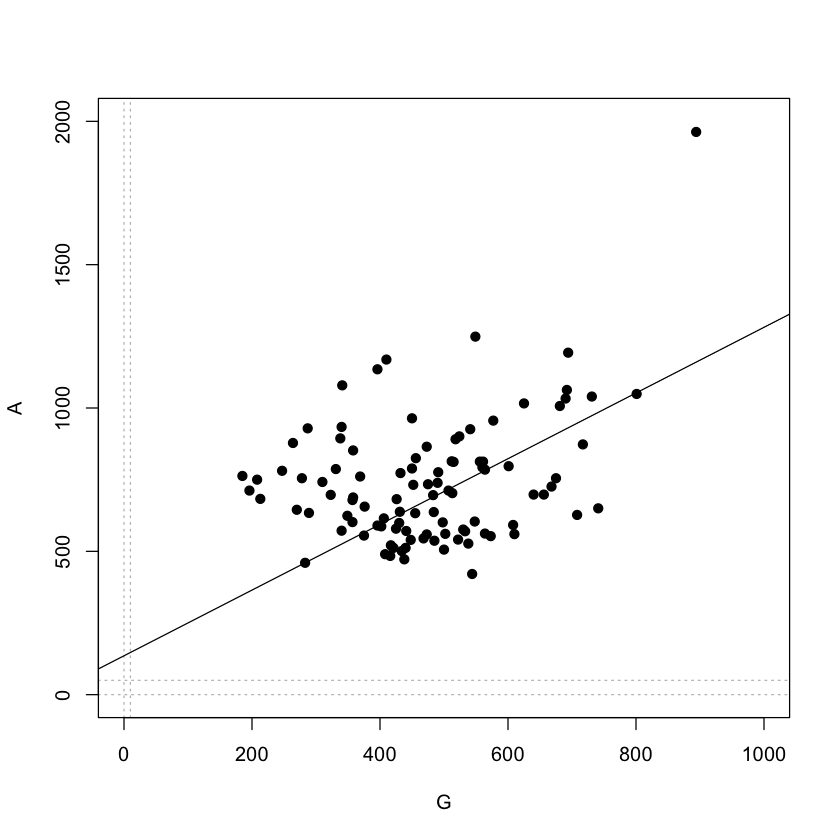

In [145]:
model.c<- lm(I(A-460)~I(G-283)+0,df.c)
model.c
summary(model.c)
plot(df.c,pch=19,ylim=c(0,2000),xlim=c(0,1000),panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="gray"))
abline(predict(model.c, newdata = list(G=0))+460, coef(model.c))

####  Make all the model go through (0,0)


Call:
lm(formula = A ~ G + 0, data = nhl)

Coefficients:
   G  
1.48  



Call:
lm(formula = A ~ G + 0, data = nhl)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


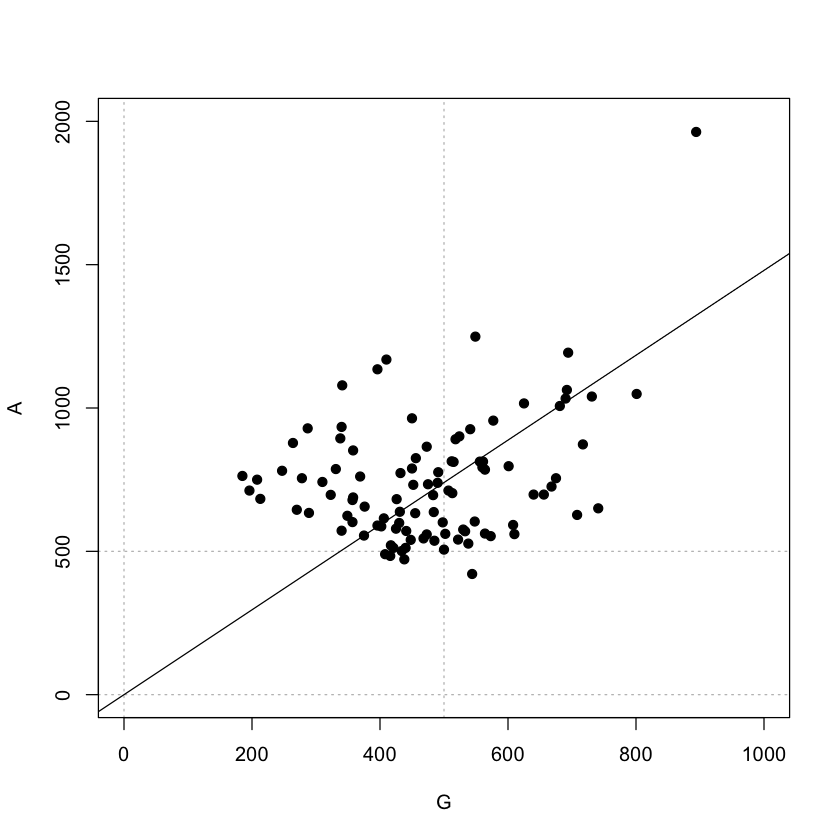

In [144]:
model.d<- lm(A~G+0,nhl)
model.d
summary(model.d)
plot(nhl,pch=19,ylim=c(0,2000),xlim=c(0,1000),panel.first=abline(h=c(0,500),v=c(0,500),lty=3,col="gray"))
abline(lm(model.d))

#### Interpret results

In [147]:
result <- matrix(c("model.a","0.09913","0.0008317","model.b","0.9082","2.2e-16","model.c","0.5758","2.2e-16","model.d","0.8972","2.2e-16"),ncol=3,byrow=TRUE)
colnames(result) <- c("Model","Adjusted R-squared","P-value")
result <- as.table(result)
result

  Model   Adjusted R-squared P-value  
A model.a 0.09913            0.0008317
B model.b 0.9082             2.2e-16  
C model.c 0.5758             2.2e-16  
D model.d 0.8972             2.2e-16  

As we can see, model.b has highest value of R^2 and lowest p-value, so it is the best model of those four.